# Data Science Regression Project: Predicting Home Prices in Banglore

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import matplotlib

### Data Load: Load banglore home prices into a dataframe

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# df.groupby('area_type')['area_type'].agg('count')
# or 
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning: Handle NA values

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.shape

(13246, 5)

## Feature Engineering

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [13]:
df2['size']= df2['size'].astype('object')

In [14]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [15]:
df2['bhk']= df2['size'].apply(lambda x: x.split(' ')[0])

In [16]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df2['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [18]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
## at above result the total_sqft also contain the ranges and not a single value we has to convert this range into the single values 

def isFloat(x):
    try:
        float(x)
    except:
        return False 
    return True
    

In [20]:
df2[~df2['total_sqft'].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


but now also has some values with sq meter , Perch etc we will ignore this values 
and convert the range value into fixed values 

In [21]:
def convert_sqft_to_num(x):
    # Split the input string by '-' to handle ranges
    tokens = x.split('-')

    # Check if the string can be split into two parts (indicating a range)
    if len(tokens) == 2:
        # Calculate the mean of the range and return
        return (float(tokens[0]) + float(tokens[1])) / 2

    # If the string cannot be split into two parts, try converting to float directly
    try:
        return float(x)
    except:
        # If conversion to float is not possible, return None
        return None


In [22]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [23]:
df3.loc[410] ## previouly it was sqft value now it is NaN 
df3.iloc[30] ## previouly it was range and now it is fixed value 

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

 Add new feature called price per square feet

In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df4 = df3.copy()

In [26]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [27]:
## number of locations that we have 
len(df4['location'].unique())

1304

### We need to apply dimensionality reduction technique here to reduce number of locations

Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [28]:
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [29]:
location_is_less_than_10 = location_stats[location_stats<=10]
location_is_less_than_10.count()

1063

In [30]:
df4.location =  df4.location.apply(lambda x : 'other' if x in location_is_less_than_10 else x )
len(df4.location.unique())

242

### Outlier Removal Using Business Logic

the minimum sqft per bedroom is 300 . if we have two bedrooms then the sqft should be minimum 600 ft if the sqft below this then it is false 
t

In [31]:
df5 = df4.copy()

In [32]:
df5['bhk']= df5['bhk'].astype('float')
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk               float64
price_per_sqft    float64
dtype: object

In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] ## deleting all the rows satisfying this condition 
df6.shape

(12502, 7)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Outlier Removal Using Standard Deviation and Mean

In [36]:
def remove_pps_outliers(df):
    # Create an empty DataFrame to store the filtered data without outliers
    df_out = pd.DataFrame()

    # Group the input DataFrame by 'location'
    for key, subdf in df.groupby('location'):
        # Calculate mean and standard deviation of 'price_per_sqft' for the current location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Filter out rows within one standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]

        # Concatenate the filtered DataFrame for the current location to the result DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    # Return the final DataFrame without outliers
    return df_out

# Example usage
df7 = remove_pps_outliers(df6)
df7.shape


(10244, 7)

In [37]:
## as seen that the price in the same area deviates from prices betweeen 2bhk and 3bhk . as the prices of 2bhk shown higher in the dataset 
# which is ambiguity we can resolve this by following function  

def plot_scatter_chart(df, location):
    # Filter data for 2 BHK and 3 BHK configurations in the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Set the size of the figure
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Plot scatter chart for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)

    # Plot scatter chart for 3 BHK
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

    # Set X and Y axis labels
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")

    # Set the title of the plot as the location
    plt.title(location)

    # Show legend to distinguish between 2 BHK and 3 BHK
    plt.legend()


In [38]:
def remove_bhk_outliers(df):
    # Initialize an array to store indices of rows to be excluded
    exclude_indices = np.array([])

    # Group the DataFrame by 'location'
    for location, location_df in df.groupby('location'):
        # Dictionary to store statistics for each BHK configuration
        bhk_stats = {}

        # Calculate mean, std, and count for each BHK configuration in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Iterate over each BHK configuration in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Get statistics for the previous BHK configuration
            stats = bhk_stats.get(bhk - 1)

            # Check if stats exist and the count is greater than 5
            if stats and stats['count'] > 5:
                # Exclude indices of rows where price_per_sqft is less than the mean of the previous BHK configuration
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    # Drop the rows with outlier indices
    return df.drop(exclude_indices, axis='index')

# Example usage
df8 = remove_bhk_outliers(df7)
df8.shape


(7342, 7)

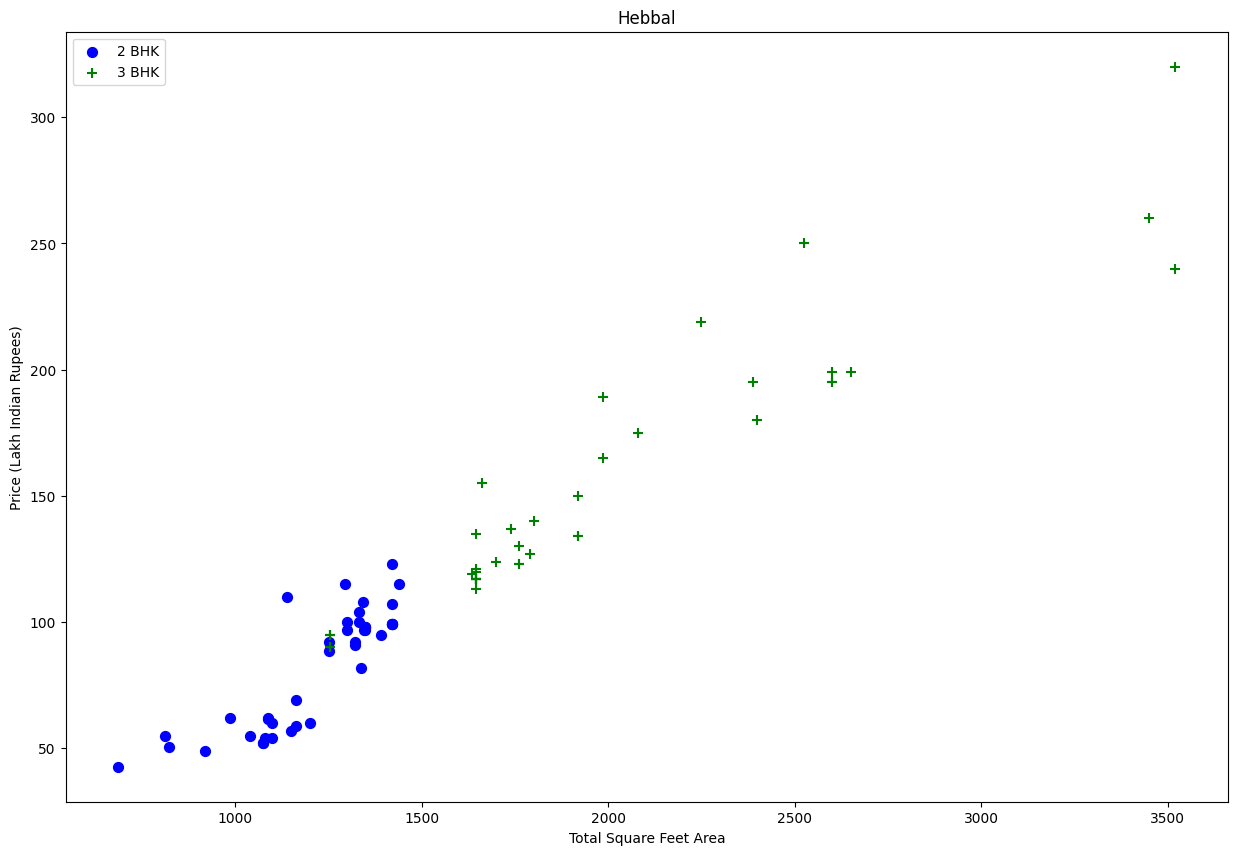

In [39]:
plot_scatter_chart(df8,"Hebbal")

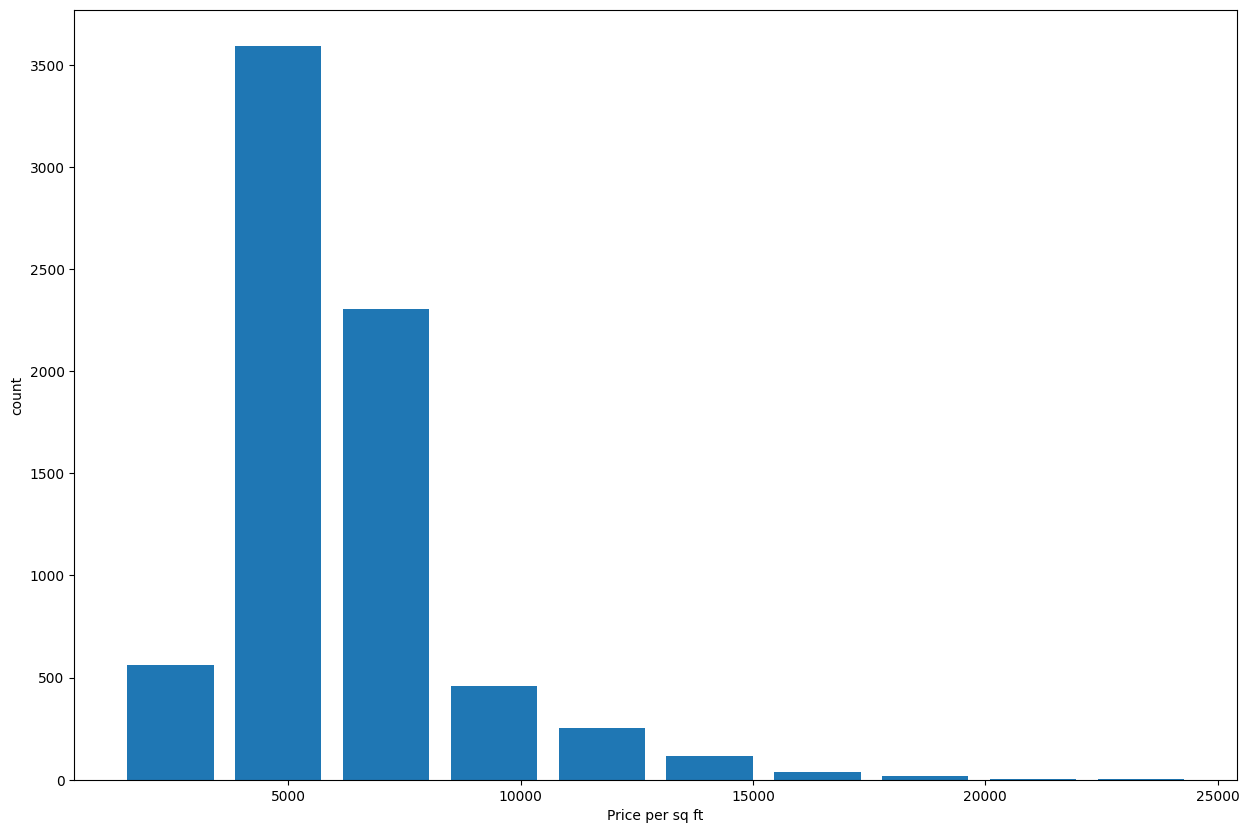

In [40]:
plt.hist(df8.price_per_sqft ,rwidth=0.8)
plt.xlabel("Price per sq ft")
plt.ylabel("count")
plt.show()

In [41]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

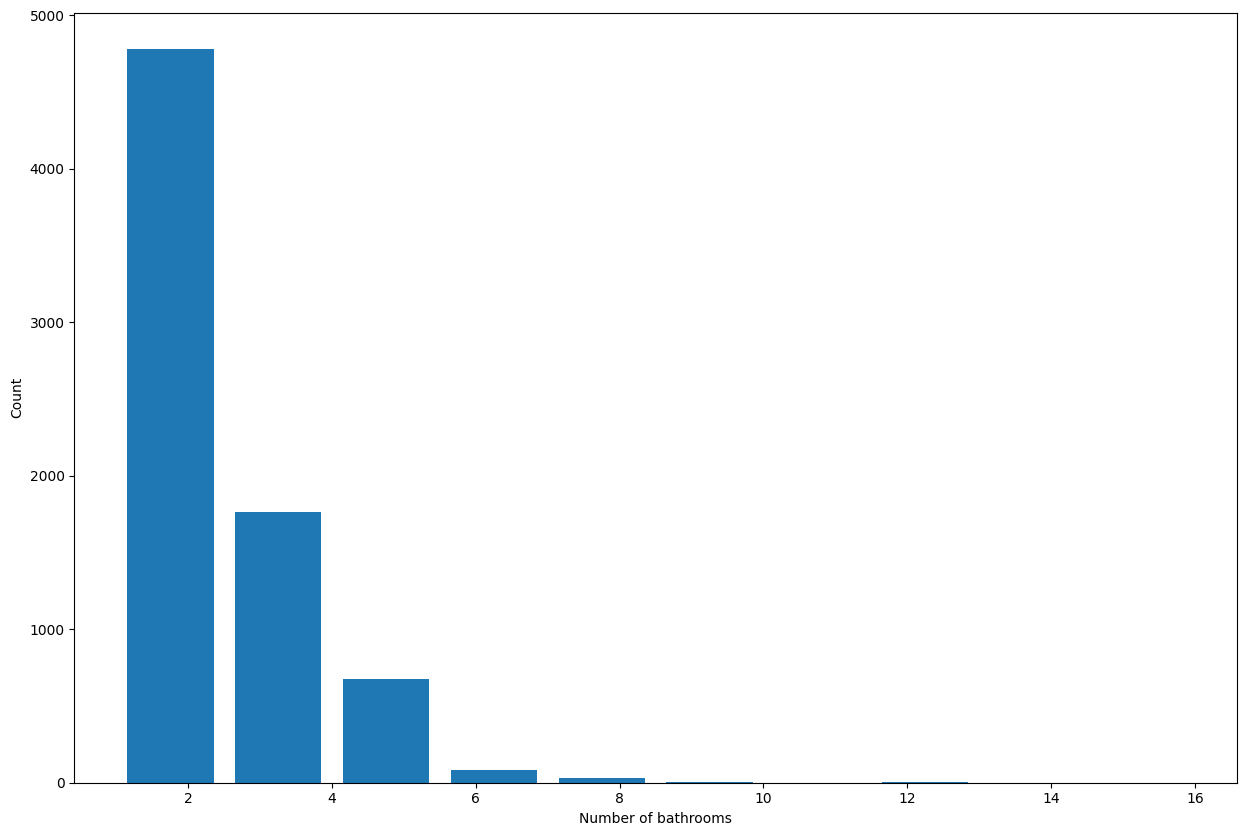

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home 
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [45]:
## creating a new df with removal of outliers 
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 7)

In [46]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0


### Use One Hot Encoding For Location to convert it into the numerical values 

In [47]:
dummies = pd.get_dummies(df10.location)
dummies = dummies.astype(int)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11 = pd.concat([df10, dummies.drop('other',axis=1)],axis=1)
df11

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1800.0,1.0,200.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,other,1353.0,2.0,110.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,other,812.0,1.0,26.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12 = df11.drop('location' , axis=1)
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = df12.drop('price',axis=1)
y = df12.price

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 )


In [52]:
X_train.shape

(5811, 244)

In [53]:
X_test.shape

(1453, 244)

In [54]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


In [55]:
lr_model.fit(X_train , y_train)


LinearRegression()

In [56]:
lr_model.score(X_test , y_test)

0.8647928507271703

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size= 0.2 , random_state=42)
scores = cross_val_score(LinearRegression(), X , y , cv=cv)
scores.mean()

0.8407766316080287

### Find best model using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Function to find the best model using GridSearchCV
def find_best_model_using_gridsearchcv(X, y):
    # Dictionary containing different algorithms, models, and their corresponding hyperparameter grids
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    # List to store the results of each model and its hyperparameters
    scores = []

    # Cross-validation method (ShuffleSplit in this case)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop over each algorithm and perform GridSearchCV
    for algo_name, config in algos.items():
        # Create GridSearchCV object
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        
        # Fit the model to the data
        gs.fit(X, y)
        
        # Append results to the scores list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # Convert the results to a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage of the function
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.845847,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.709511,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.687831,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [59]:
def predict_price(location, sqft, bath, bhk):
    # Find the index of the specified location in the feature columns
    loc_index = X.columns.get_loc(location)

    # Create an array of zeros with the length of the feature columns
    x = np.zeros(len(X.columns))
    
    # Assign values to the features in the array
    x[0] = sqft  # Square feet
    x[1] = bath  # Number of bathrooms
    x[2] = bhk   # Number of bedrooms
    
    # If the location is in the feature columns, set its corresponding value to 1
    if loc_index >= 0:
        x[loc_index] = 1

    # Use the trained linear regression model to predict the price for the input features
    return lr_model.predict([x])[0]


In [60]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

88.52930125513076

In [61]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

91.45734003928135

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

191.08738933500774

In [63]:
predict_price('Indira Nagar',1000, 3, 3)

194.01542811915834

### Export the tested model to a pickle file

In [64]:
import pickle
with open('Banglore_price_predictor.model' , 'wb') as f :
    pickle.dump(lr_model,f)

In [65]:
## Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))